In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pickle


In [2]:
#pickle_file = open("dic_IPA_cal.pkl", "rb")


#dic_IPA = pickle.load(pickle_file)

#pickle_file = open("dic_Methanol_cal.pkl", "rb")
#dic_Methanol = pickle.load(pickle_file)

pickle_file = open("dic_Ethanol_cal.pkl", "rb")
dic_Ethanol = pickle.load(pickle_file)

pickle_file = open("dic_samples.pkl", "rb")
dic_samples = pickle.load(pickle_file)



pickle_file = open("dic_samples_norm.pkl", "rb")
dic_samples_norm = pickle.load(pickle_file)

In [3]:
pickle_file = open("dic_solvents.pkl","rb")
dic_solvents = pickle.load(pickle_file)

In [4]:
nafion = dic_samples['20-10-23 Nafion EtOH']['0_ EtOH 90 min.CSV']

In [5]:
low = 650
high = 3600


wn = nafion.index
wn =wn[wn > low];

wn = wn[wn < high];

In [6]:

col_labels = np.round(wn,2).astype('str')
samples = pd.DataFrame(index = dic_samples['20-10-23 Nafion EtOH'].keys(),columns = col_labels)


for j in dic_samples['20-10-23 Nafion EtOH']:
    df = dic_samples['20-10-23 Nafion EtOH'][j]
    df = df.loc[df.index>low]
    df = df.loc[df.index<high]
    samples.loc[j,:] = list(df.Absorbance)

samples.index


etoh_sat_val = [0,100,12.5,25,37.5,50,62.5,75,87.5]

samples['etoh_sat'] = etoh_sat_val

samples.sort_values(by = ['etoh_sat'],axis = 0, inplace = True)

In [7]:
ethanol = samples.loc[samples['etoh_sat'] == 100]
ethanol = ethanol.transpose().iloc[:-1,:]

In [8]:
nafion = nafion.loc[nafion.index>low]#& nafion.index <1300]
nafion = nafion.loc[nafion.index<high]

In [9]:
legend = ['EtOH','nafion']
legend.extend(list(dic_samples_norm['20-10-23 Nafion EtOH'].keys()))
legend

['EtOH',
 'nafion',
 '0_ EtOH 90 min.CSV',
 '100_ EtOH 2 hr.CSV',
 '12.5_ EtOH 2 hr.CSV',
 '25_ EtOH 2 hr.CSV',
 '37.5_ EtOH 2 hr.CSV',
 '50_ EtOH 2 hr.CSV',
 '62.5_ EtOH 2 hr.CSV',
 '75_ EtOH 90 min.CSV',
 '87.5_ EtOH 2 hr.CSV']

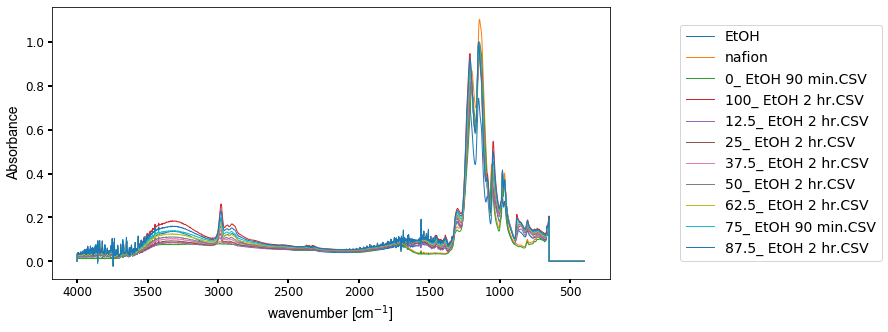

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.plot(wn,ethanol.iloc[:,0],linewidth = 1,)

ax.plot(wn,nafion.iloc[:,0],linewidth = 1,)

for j in dic_samples_norm['20-10-23 Nafion EtOH']:
    df = dic_samples_norm['20-10-23 Nafion EtOH'][j]
    ax.plot(df.index,df.iloc[:,0],linewidth = 1)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('Absorbance', fontsize=14, fontname = 'Arial')
ax.set_xlabel('wavenumber [cm$^{-1}$]', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(10, 5)
plt.legend(legend, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [11]:
nafion_abs = np.interp(ethanol.index,nafion.index,nafion.Absorbance)

nafion.reset_index(inplace = True)
nafion['wn'] = ethanol.index
nafion.set_index('wn', inplace = True)

In [12]:
n = 2

col_labels = np.round(wn).astype('str')
col_labels = np.concatenate((['EtOH','Nafion'],col_labels),axis = 0)
data = pd.DataFrame(np.zeros((n,len(wn)+2)),columns = col_labels)

In [13]:
pure_components = pd.concat([ethanol.iloc[:,0],nafion.iloc[:,0]], axis = 1)
pure_components.columns = ['EtOH','Nafion']

Comp = np.array([[0],[1]])

In [14]:
for x in range(len(Comp)):
    vec = Comp[x]
    vec = [vec[0],1-vec[0]]
    spectra = np.sum(vec*pure_components,axis =1)
    data.iloc[x,2:] = np.asarray(spectra)
    
data.EtOH = Comp;
data.Nafion = 1-Comp;

In [15]:
data

,EtOH,Nafion,650.0,650.0,651.0,651.0,651.0,651.0,652.0,652.0,...,3598.0,3598.0,3598.0,3599.0,3599.0,3599.0,3599.0,3599.0,3600.0,3600.0
0,0,1,0.173389,0.173225,0.172990,0.17270,0.172375,0.172035,0.171703,0.171405,...,0.039839,0.039638,0.039576,0.039674,0.039919,0.040272,0.040682,0.041095,0.041452,0.041685
1,1,0,0.153491,0.153286,0.153138,0.15298,0.152732,0.152312,0.151651,0.150719,...,0.038046,0.039427,0.040397,0.040885,0.041003,0.040959,0.040939,0.041035,0.041219,0.041345


In [16]:
X_train = data.iloc[:,2:]
y_train = data.iloc[:,0]


In [17]:
mlp = LinearRegression()
mlp.fit(X_train, y_train)


LinearRegression()

In [18]:
pca = PCA()
X_train = pca.fit_transform(X_train)


In [19]:
mlp_pca = LinearRegression()
mlp_pca.fit(X_train, y_train)


LinearRegression()

In [20]:
col_labels = np.round(wn).astype('str')
samples = pd.DataFrame(index = dic_samples['20-10-23 Nafion EtOH'].keys(),columns = col_labels)

In [21]:

for j in dic_samples['20-10-23 Nafion EtOH']:
    df = dic_samples['20-10-23 Nafion EtOH'][j]
    df = df.loc[df.index>low]
    df = df.loc[df.index<high]
    samples.loc[j,:] = list(df.Absorbance)

In [22]:
samples.index

Index(['0_ EtOH 90 min.CSV', '100_ EtOH 2 hr.CSV', '12.5_ EtOH 2 hr.CSV',
       '25_ EtOH 2 hr.CSV', '37.5_ EtOH 2 hr.CSV', '50_ EtOH 2 hr.CSV',
       '62.5_ EtOH 2 hr.CSV', '75_ EtOH 90 min.CSV', '87.5_ EtOH 2 hr.CSV'],
      dtype='object')

In [23]:

etoh_sat_val = [0,100,12.5,25,37.5,50,62.5,75,87.5]

samples['etoh_sat'] = etoh_sat_val

samples.sort_values(by = ['etoh_sat'],axis = 0, inplace = True)

In [24]:
mlp.predict(samples.iloc[:,:-1])
#this is without PCA

array([-1.77635684e-15,  3.72387851e-01,  4.89022708e-01,  5.70919854e-01,
        6.50053891e-01,  7.28125712e-01,  8.09165319e-01,  9.06227744e-01,
        1.00000000e+00])

In [25]:
samples_pca = pca.transform(samples.iloc[:,:-1])
mlp_pca.predict(samples_pca)

array([5.55111512e-17, 3.72334486e-01, 4.88989728e-01, 5.70907476e-01,
       6.50035127e-01, 7.28154409e-01, 8.09194311e-01, 9.06248308e-01,
       1.00000000e+00])

In [29]:
models = ['LR', 'LR with PCA']

results_EtOH = pd.DataFrame(index = samples.index, columns = models)

results_EtOH['EtOH %'] = samples['etoh_sat']

In [30]:
results_EtOH.LR = mlp.predict(samples.iloc[:,:-1])
results_EtOH['LR with PCA'] = mlp_pca.predict(samples_pca)

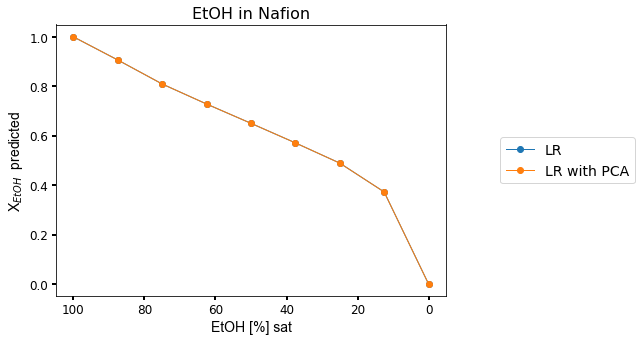

In [31]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_EtOH['EtOH %'],results_EtOH[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{EtOH}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('EtOH [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH in Nafion', fontsize = 16)
plt.show()

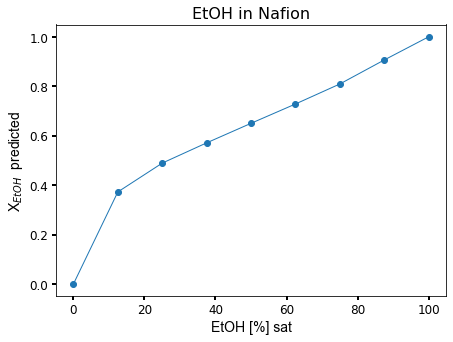

In [32]:
fig = plt.figure()
ax = plt.axes()

ax.plot(results_EtOH['EtOH %'],results_EtOH['LR'],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{EtOH}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('EtOH [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
#ax.invert_xaxis()
fig.set_size_inches(7, 5)
#plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH in Nafion', fontsize = 16)
plt.show()

In [ ]:
#results_EtOH.to_csv('20-10-23 Nafion EtOH\EtOH Scores 2 points.csv')


In [ ]:
#results_EtOH['LR'].to_csv('EtOH.csv')

In [33]:
ind = 1

data.EtOH[ind]

vec = [results_EtOH.LR[ind],1-results_EtOH.LR[ind]]
spectra = np.sum(vec*pure_components,axis =1)


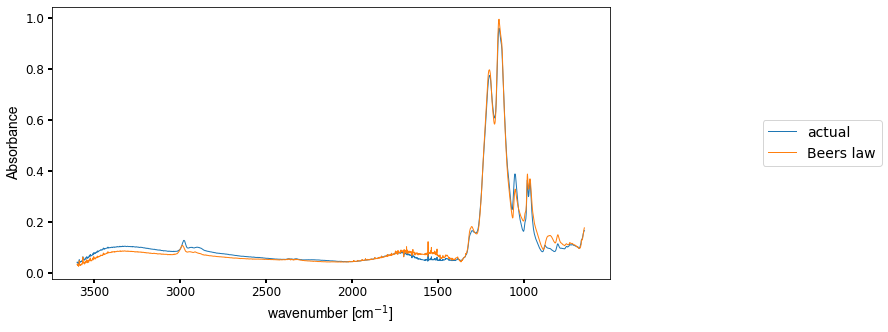

In [34]:
fig = plt.figure()
ax = plt.axes()

ax.plot(wn,spectra,linewidth = 1,)
ax.plot(wn,samples.iloc[ind,:-1],linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('Absorbance', fontsize=14, fontname = 'Arial')
ax.set_xlabel('wavenumber [cm$^{-1}$]', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(10, 5)
plt.legend(['actual','Beers law'], fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [35]:
from sklearn.metrics import r2_score
r2_score(spectra,samples.iloc[ind,:-1])

0.9866897481759695